In [7]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [8]:
#Read path with Pandas
Polarbear_data = pd.read_csv('CS_SB_PBearMeasurementData_1981_2017.csv')
Polarbear_data

,Collecting_Agency,Population,Date,BearID,Sex,Age,Total_Length,Standard_Length,Heart_Girth,Skull_Width,...,Condition_Score,Number_of_cubs,Cub_Age,Gut_Fill,Litter_mass,Fat_In_Adipose,Gut_Fill_Obs,Snout_Vent_Length,Resistance,Percent_Body_Fat
0,USGS,SB,1982-04-09,1,M,17,218,no data,140,no data,...,2,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
1,USGS,SB,1986-05-04,1,M,21,240,219.4,149,24,...,2,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
2,USGS,SB,1987-04-21,1,M,22,238,216.4,129,24,...,3,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
3,USGS,SB,1987-04-06,2,F,18,212,196.5,127,22,...,4,0,NaN,no data,196.5,no data,no data,no data,no data,no data
4,USGS,SB,1981-10-19,2,F,12,198,no data,175,no data,...,4,2,C2,no data,no data,no data,no data,no data,no data,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,USGS,SB,2009-05-08,2290,F,10,226,199.2,124.7,20.3,...,3,0,NaN,no data,199.2,no data,no data,no data,no data,no data
3167,USGS,SB,2006-04-03,2291,F,13,227,200,125.3,21.5,...,3,1,C1,no data,200,no data,no data,no data,no data,no data
3168,USGS,SB,2006-04-03,2292,F,1,167,148,81.5,14.6,...,3,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
3169,USGS,SB,2016-04-22,2293,F,10,no data,201,124,20.5,...,3,0,NaN,no data,201,no data,no data,no data,no data,no data


In [9]:
# Get info on the Dataset
Polarbear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Collecting_Agency  3171 non-null   object
 1   Population         3171 non-null   object
 2   Date               3171 non-null   object
 3   BearID             3171 non-null   int64 
 4   Sex                3171 non-null   object
 5   Age                3171 non-null   object
 6   Total_Length       2703 non-null   object
 7   Standard_Length    3171 non-null   object
 8   Heart_Girth        3171 non-null   object
 9   Skull_Width        3171 non-null   object
 10  Tail_Length        3171 non-null   object
 11  Mass               3171 non-null   object
 12  Condition_Score    3171 non-null   object
 13  Number_of_cubs     994 non-null    object
 14  Cub_Age            610 non-null    object
 15  Gut_Fill           2836 non-null   object
 16  Litter_mass        880 non-null    object


In [10]:
cleaned_polarbear = Polarbear_data[['Date','BearID', 'Sex', 'Age', 'Mass', 'Total_Length','Number_of_cubs']]
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs
0,1982-04-09,1,M,17,267.6,218,NaN
1,1986-05-04,1,M,21,no data,240,NaN
2,1987-04-21,1,M,22,no data,238,NaN
3,1987-04-06,2,F,18,no data,212,0
4,1981-10-19,2,F,12,no data,198,2
...,...,...,...,...,...,...,...
3166,2009-05-08,2290,F,10,195.5,226,0
3167,2006-04-03,2291,F,13,no data,227,1
3168,2006-04-03,2292,F,1,no data,167,NaN
3169,2016-04-22,2293,F,10,202.3,no data,0


In [11]:
cleaned_polarbear['Date'] = pd.to_datetime(cleaned_polarbear['Date'])
cleaned_polarbear['year'] = cleaned_polarbear['Date'].dt.year
cleaned_polarbear

C:\Users\nickn\AppData\Local\Temp\ipykernel_4836\803163165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_polarbear['Date'] = pd.to_datetime(cleaned_polarbear['Date'])
C:\Users\nickn\AppData\Local\Temp\ipykernel_4836\803163165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_polarbear['year'] = cleaned_polarbear['Date'].dt.year


,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1,M,17,267.6,218,NaN,1982
1,1986-05-04,1,M,21,no data,240,NaN,1986
2,1987-04-21,1,M,22,no data,238,NaN,1987
3,1987-04-06,2,F,18,no data,212,0,1987
4,1981-10-19,2,F,12,no data,198,2,1981
...,...,...,...,...,...,...,...,...
3166,2009-05-08,2290,F,10,195.5,226,0,2009
3167,2006-04-03,2291,F,13,no data,227,1,2006
3168,2006-04-03,2292,F,1,no data,167,NaN,2006
3169,2016-04-22,2293,F,10,202.3,no data,0,2016


In [12]:
# Convert 'Age', 'Mass', 'Total_Length', 'Number_of_cubs', and 'year' to float, turning 'no data' into NaN
cleaned_polarbear['Age'] = pd.to_numeric(cleaned_polarbear['Age'], errors='coerce')
cleaned_polarbear['Mass'] = pd.to_numeric(cleaned_polarbear['Mass'], errors='coerce')
cleaned_polarbear['Total_Length'] = pd.to_numeric(cleaned_polarbear['Total_Length'], errors='coerce')
cleaned_polarbear['Number_of_cubs'] = pd.to_numeric(cleaned_polarbear['Number_of_cubs'], errors='coerce')
cleaned_polarbear['year'] = pd.to_numeric(cleaned_polarbear['year'], errors='coerce')
cleaned_polarbear['BearID'] = pd.to_numeric(cleaned_polarbear['BearID'], errors='coerce')
cleaned_polarbear

C:\Users\nickn\AppData\Local\Temp\ipykernel_4836\3822074629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_polarbear['Age'] = pd.to_numeric(cleaned_polarbear['Age'], errors='coerce')
C:\Users\nickn\AppData\Local\Temp\ipykernel_4836\3822074629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_polarbear['Mass'] = pd.to_numeric(cleaned_polarbear['Mass'], errors='coerce')
C:\Users\nickn\AppData\Local\Temp\ipykernel_4836\3822074629.py:4: SettingWithCopyWarning: 
A value is trying to be set

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1,M,17.0,267.6,218.0,NaN,1982
1,1986-05-04,1,M,21.0,NaN,240.0,NaN,1986
2,1987-04-21,1,M,22.0,NaN,238.0,NaN,1987
3,1987-04-06,2,F,18.0,NaN,212.0,0.0,1987
4,1981-10-19,2,F,12.0,NaN,198.0,2.0,1981
...,...,...,...,...,...,...,...,...
3166,2009-05-08,2290,F,10.0,195.5,226.0,0.0,2009
3167,2006-04-03,2291,F,13.0,NaN,227.0,1.0,2006
3168,2006-04-03,2292,F,1.0,NaN,167.0,NaN,2006
3169,2016-04-22,2293,F,10.0,202.3,NaN,0.0,2016


In [13]:
# Handling Missing Values
# Option 1: Drop rows with any missing values in 'Date', 'Sex', 'Number_of_cubs' or'Mass'
df_cleaned = cleaned_polarbear.dropna(subset=['Mass', 'Total_Length', 'year', 'Number_of_cubs'])
df_cleaned

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
5,1986-04-29,2,F,17.0,213.2,212.0,2.0,1986
7,1985-05-11,4,F,16.0,204.1,218.0,2.0,1985
11,1984-03-28,7,F,13.0,215.5,226.0,1.0,1984
12,1991-04-08,8,F,22.0,206.4,218.5,0.0,1991
13,1992-04-14,8,F,23.0,158.8,231.0,2.0,1992
...,...,...,...,...,...,...,...,...
3145,2010-04-14,2275,F,10.0,160.6,221.0,2.0,2010
3152,2010-04-12,2280,F,8.0,169.6,220.0,2.0,2010
3153,2011-04-02,2280,F,9.0,161.0,216.3,2.0,2011
3166,2009-05-08,2290,F,10.0,195.5,226.0,0.0,2009


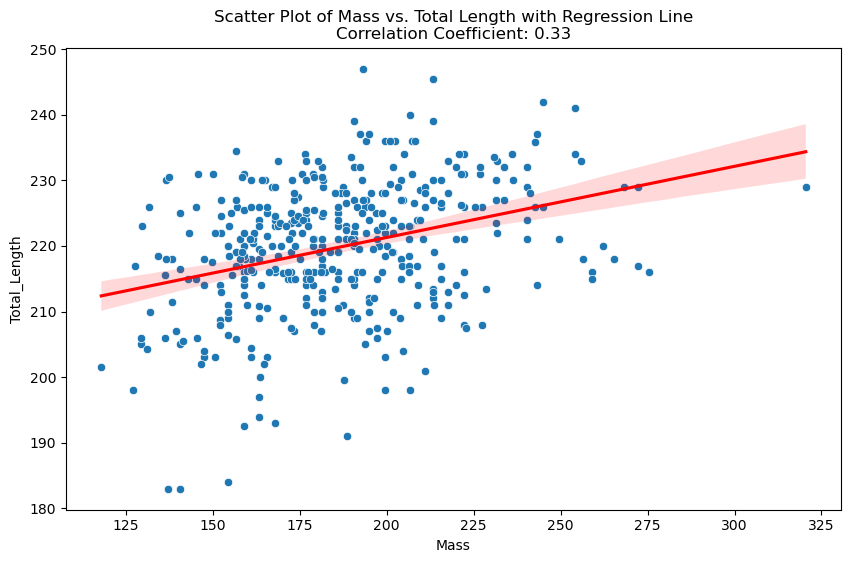

In [37]:
#Sample Graph
import seaborn as sns
import matplotlib.pyplot as plt


correlation_coefficient = df_cleaned['Mass'].corr(df_cleaned['Total_Length'])

# Now, create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mass', y='Total_Length', data=df_cleaned)
sns.regplot(x='Mass', y='Total_Length', data=df_cleaned, scatter=False, color='red')

# Add correlation coefficient to the plot
plt.title(f'Scatter Plot of Mass vs. Total Length with Regression Line\nCorrelation Coefficient: {correlation_coefficient:.2f}')

# Show the plot
plt.show()



C:\Users\nickn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


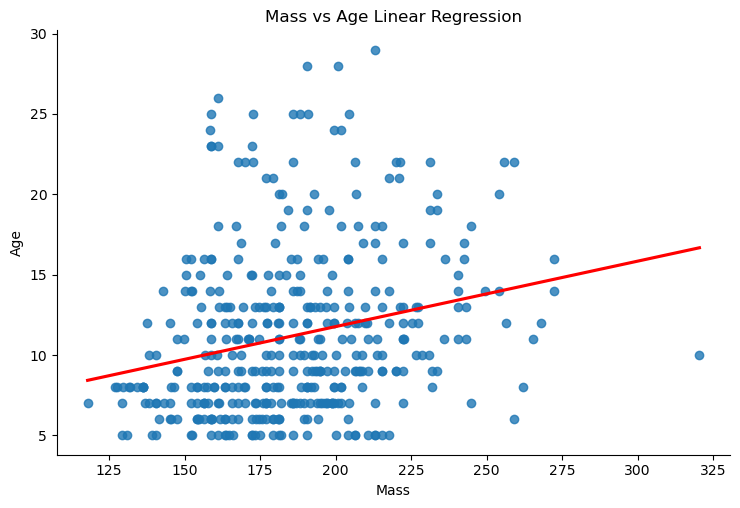

In [54]:
#Sample Graph # 2
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a linear regression line
sns.lmplot(x='Mass', y='Age', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Mass vs Age Linear Regression')
plt.xlabel('Mass')
plt.ylabel('Age')

# Show the plot
plt.show()


C:\Users\nickn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


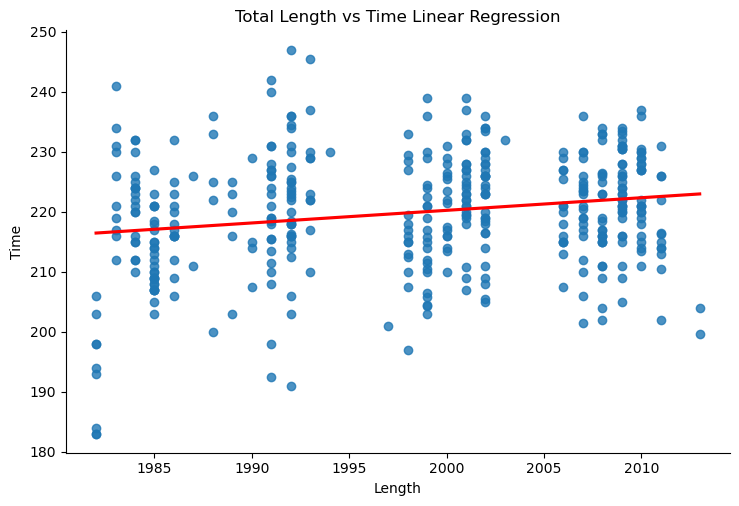

In [45]:
#Sample Graph # 3
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a linear regression line
sns.lmplot(x='year', y='Total_Length', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Total Length vs Time Linear Regression')
plt.xlabel('Length')
plt.ylabel('Time')

# Show the plot
plt.show()

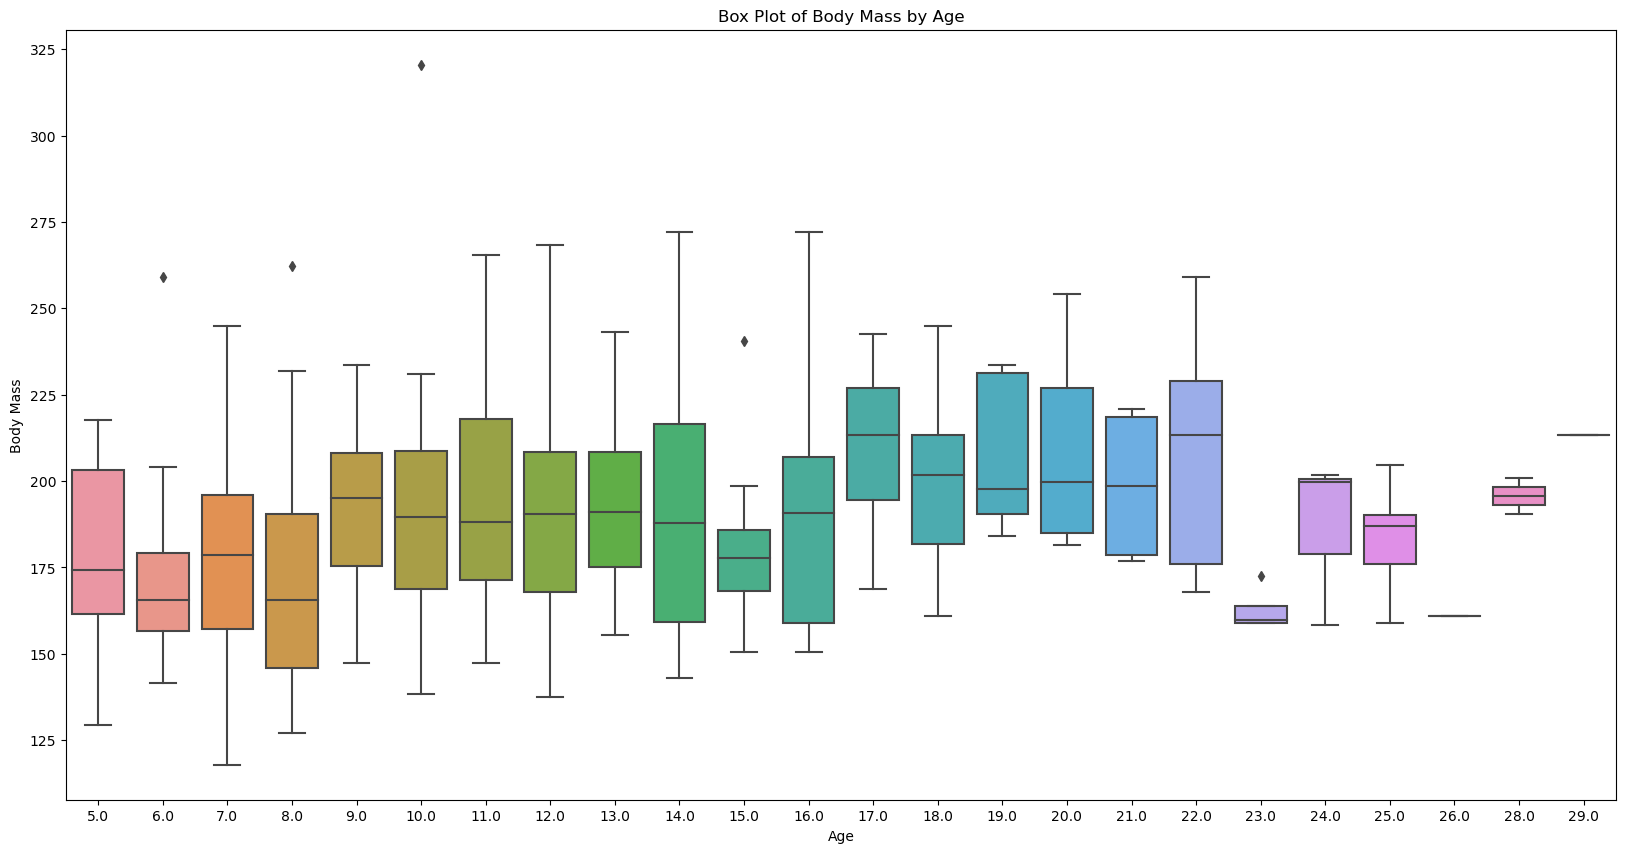

In [52]:
#Example of Boxplot
import seaborn as sns
import matplotlib.pyplot as plt



# Create a box plot of mass by sex and age
plt.figure(figsize=(20, 10))
sns.boxplot(x='Age', y='Mass',  data=df_cleaned)

# Add title and labels
plt.title('Box Plot of Body Mass by Age')
plt.xlabel('Age')
plt.ylabel('Body Mass')

# Show the plot
plt.show()


Distribution of Male vs. Female
Distribution of Female vs Female with Cubs

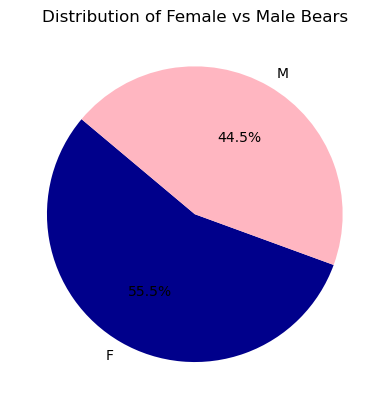

In [56]:
# Counting the number of female and male Bears
sex_distribution = cleaned_polarbear['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Males')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

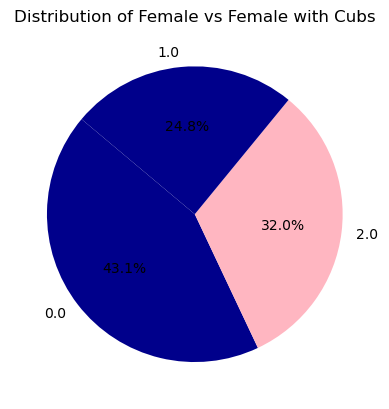

In [57]:
# Counting the number of female and females with cubs
sex_distribution = df_cleaned['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Female with Cubs')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

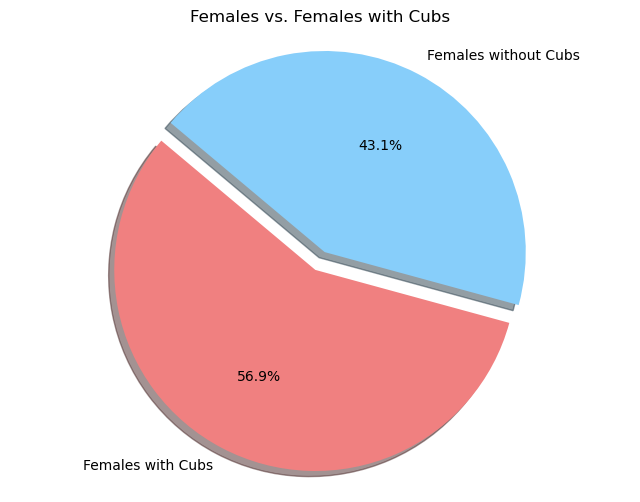

In [58]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'Sex' and 'Number_of_cubs' columns
# Filter the DataFrame for only females
females = df_cleaned[df_cleaned['Sex'] == 'F']

# Determine the count of females without cubs and with cubs
females_with_cubs = females[females['Number_of_cubs'] > 0].shape[0]
females_without_cubs = females[females['Number_of_cubs'] == 0].shape[0]

# Data to plot
labels = 'Females with Cubs', 'Females without Cubs'
sizes = [females_with_cubs, females_without_cubs]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Females vs. Females with Cubs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


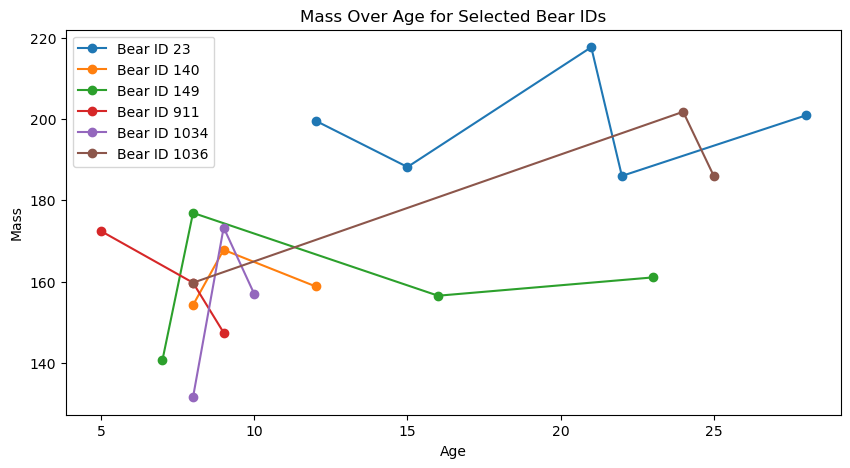

In [69]:
#Line plot age vs Mass
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
selected_bear_ids = [23, 140, 149, 911, 1034, 1036,]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('Age')

# Plotting 'Year' vs 'Mass' for each Bear ID
plt.figure(figsize=(10,5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['Age'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Adding title and labels
plt.title('Mass Over Age for Selected Bear IDs')
plt.xlabel('Age')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()


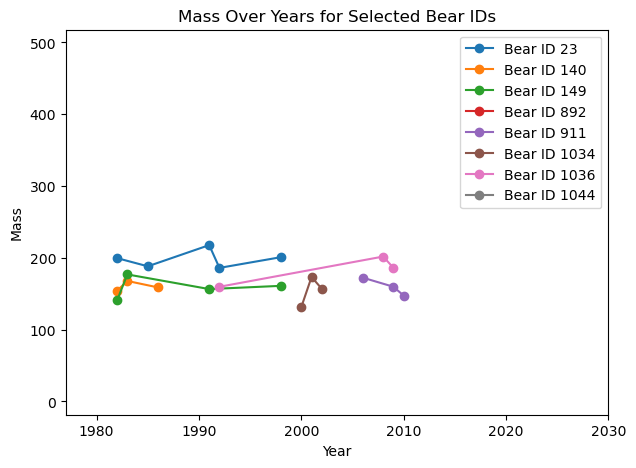

In [65]:
import matplotlib.pyplot as plt


selected_bear_ids = [23, 140, 149, 911, 1034, 1036, 1044]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('year')

# Increase the figure size for better visibility
plt.figure(figsize=(7, 5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['year'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Expand the x and y limits if needed to include more data
plt.xlim(min(selected_bears_sorted['year']) - 5, max(selected_bears_sorted['year']) + 20)
plt.ylim(min(selected_bears_sorted['Mass']) - 150, max(selected_bears_sorted['Mass']) + 300)

# Adding title and labels
plt.title('Mass Over Years for Selected Bear IDs')
plt.xlabel('Year')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()
